In [250]:
#library import
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import grangercausalitytests
from statsmodels.tsa.vector_ar.vecm import coint_johansen
from statsmodels.stats.stattools import durbin_watson
from IPython.display import display
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings(action='ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
plt.rcParams['font.family'] = 'Malgun Gothic'
%matplotlib inline
import itertools
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')

data_dir='C:/Users/kdh2/BIGCON/data/total'
data_list = os.listdir(data_dir)


#항목별 저장
data_list_single_hitter = [data_list[x] for x in range(len(data_list)) if data_list[x].split('_')[-2].startswith('개인타자')]
data_single_hitter = [pd.read_csv(os.path.join(data_dir, data_list_single_hitter[x]), encoding='cp949') for x in range(len(data_list_single_hitter))]
data_list_single_pitcher = [data_list[x] for x in range(len(data_list)) if data_list[x].split('_')[-2].startswith('개인투수')]
data_single_pitcher = [pd.read_csv(os.path.join(data_dir, data_list_single_pitcher[x]), encoding='cp949') for x in range(len(data_list_single_pitcher))]
data_list_games = [data_list[x] for x in range(len(data_list)) if data_list[x].split('_')[-2].startswith('경기')]
data_games = [pd.read_csv(os.path.join(data_dir, data_list_games[x]), encoding='cp949') for x in range(len(data_list_games))]
data_list_player_enroll = [data_list[x] for x in range(len(data_list)) if data_list[x].split('_')[-2].startswith('등록선수')]
data_player_enroll = [pd.read_csv(os.path.join(data_dir, data_list_player_enroll[x]), encoding='cp949') for x in range(len(data_list_player_enroll))]
data_list_players = [data_list[x] for x in range(len(data_list)) if data_list[x].split('_')[-2].startswith('선수')]
data_players = [pd.read_csv(os.path.join(data_dir, data_list_players[x]), encoding='cp949') for x in range(len(data_list_players))]
data_list_teams = [data_list[x] for x in range(len(data_list)) if data_list[x].split('_')[-2].startswith('팀')]
data_teams = [pd.read_csv(os.path.join(data_dir, data_list_teams[x]), encoding='cp949') for x in range(len(data_list_teams))]
data_list_team_hitter = [data_list[x] for x in range(len(data_list)) if data_list[x].split('_')[-2].startswith('팀타자')]
data_team_hitter = [pd.read_csv(os.path.join(data_dir, data_list_team_hitter[x]), encoding='cp949') for x in range(len(data_list_team_hitter))]
data_list_team_pitcher = [data_list[x] for x in range(len(data_list)) if data_list[x].split('_')[-2].startswith('팀투수')]
data_team_pitcher = [pd.read_csv(os.path.join(data_dir, data_list_team_pitcher[x]), encoding='cp949') for x in range(len(data_list_team_pitcher))]


team=pd.concat(data_team_hitter,axis=0)
for i in range(0,5):
    data_team_hitter[i]['AVG']=data_team_hitter[i]['HIT']/data_team_hitter[i]['AB']
    data_team_hitter[i]['year']=data_team_hitter[i]['G_ID'].apply(lambda x: int(x[:4]))
    data_team_hitter[i]['month']=data_team_hitter[i]['G_ID'].apply(lambda x: int(x[4:6]))  


team['AVG']=team['HIT']/team['AB']
team['year']=team['G_ID'].apply(lambda x: int(x[:4]))
team['month']=team['G_ID'].apply(lambda x: int(x[4:6]))

In [251]:
team_2016=data_team_hitter[0]
team_2017=data_team_hitter[1]
team_2018=data_team_hitter[2]
team_2019=data_team_hitter[3]
team_2020=data_team_hitter[4]

In [199]:
from IPython.display import display
import itertools
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.api import SimpleExpSmoothing, Holt, ExponentialSmoothing

import warnings
warnings.filterwarnings(action='ignore')

In [260]:
df_list=[team,team_2016,team_2017,team_2018,team_2019,team_2020]
team.columns=['게임키','일자','팀','상대팀코드','더블헤더코드','초말','타자','총타수','타점','득점','안타',
             '2루타','3루타','홈런','도루','도루실패','희타','희비','4구','고4','사구','삼진','병살타','실책','잔루',
             '득점권타율','득점권타수','득점권안타','타율','년도','월']
   
for i in range(0,5):
    data_team_hitter[i].columns=['게임키','일자','팀','상대팀코드','더블헤더코드','초말','타자','총타수','타점','득점','안타',
             '2루타','3루타','홈런','도루','도루실패','희타','희비','4구','고4','사구','삼진','병살타','실책','잔루',
             '득점권타율','득점권타수','득점권안타','타율','년도','월']
   


    

# 2016

In [171]:
team_2016['팀'].value_counts()
#경기수는 모두 같다

SS    144
NC    144
SK    144
HT    144
KT    144
HH    144
WO    144
LG    144
OB    144
LT    144
Name: 팀, dtype: int64

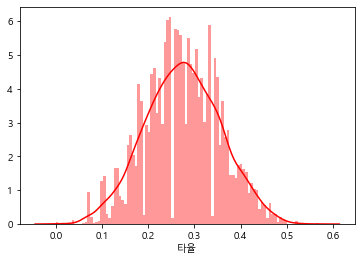

In [173]:
#모든 경기에 대한 타율 분포
sns.distplot(team['타율'],bins=100,color='r')

In [258]:
team_2016

,G_ID,GDAY_DS,T_ID,VS_T_ID,HEADER_NO,TB_SC,PA,AB,RBI,RUN,...,KK,GD,ERR,LOB,P_HRA_RT,P_AB_CN,P_HIT_CN,AVG,year,month
0,20160401HHLG0,20160401,LG,HH,0,B,47,42,4,5,...,11,0,0,8,0.333333,12,4,0.214286,2016,4
1,20160401HHLG0,20160401,HH,LG,0,T,52,46,4,4,...,10,1,2,12,0.200000,15,3,0.282609,2016,4
2,20160401HTNC0,20160401,NC,HT,0,B,36,30,5,5,...,9,1,1,7,0.142857,7,1,0.300000,2016,4
3,20160401HTNC0,20160401,HT,NC,0,T,38,34,3,4,...,10,1,0,7,0.100000,10,1,0.235294,2016,4
4,20160401KTSK0,20160401,SK,KT,0,B,36,36,4,4,...,7,1,1,5,0.375000,8,3,0.277778,2016,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,20161008SSSK0,20161008,SS,SK,0,T,39,36,5,6,...,4,1,2,6,0.250000,8,2,0.277778,2016,10
1436,20161009KTNC0,20161009,NC,KT,0,B,41,39,3,4,...,13,0,0,10,0.111111,18,2,0.307692,2016,10
1437,20161009KTNC0,20161009,KT,NC,0,T,43,38,5,7,...,7,0,0,9,0.100000,10,1,0.368421,2016,10
1438,20161009WOLT0,20161009,LT,WO,0,B,38,36,8,8,...,4,2,0,6,0.416667,12,5,0.305556,2016,10


In [351]:
HEADER_2016=team_2016.groupby(['팀'])['더블헤더코드'].sum().reset_index()
AVG_mean_2016=team_2016.groupby(['팀'])['타율'].mean().reset_index()
ERR_2016=team_2016.groupby(['팀'])['실책'].sum().sort_values(ascending=False).reset_index()
H2_2016=team_2016.groupby(['팀'])['2루타'].sum().sort_values(ascending=False).reset_index()
P_HRA_2016=team_2016.groupby(['팀'])['득점권타율'].mean().sort_values(ascending=False).reset_index()
dead_ball_2016=team_2016.groupby(['팀'])['사구'].mean().sort_values(ascending=False).reset_index()
HR_2016=team_2016.groupby(['팀'])['홈런'].sum().sort_values(ascending=False).reset_index()
GD_2016=team_2016.groupby(['팀'])['병살타'].sum().sort_values(ascending=False).reset_index()

[Text(0.5, 0, '팀'), Text(0.5, 1.0, '2016 홈런 총합')]

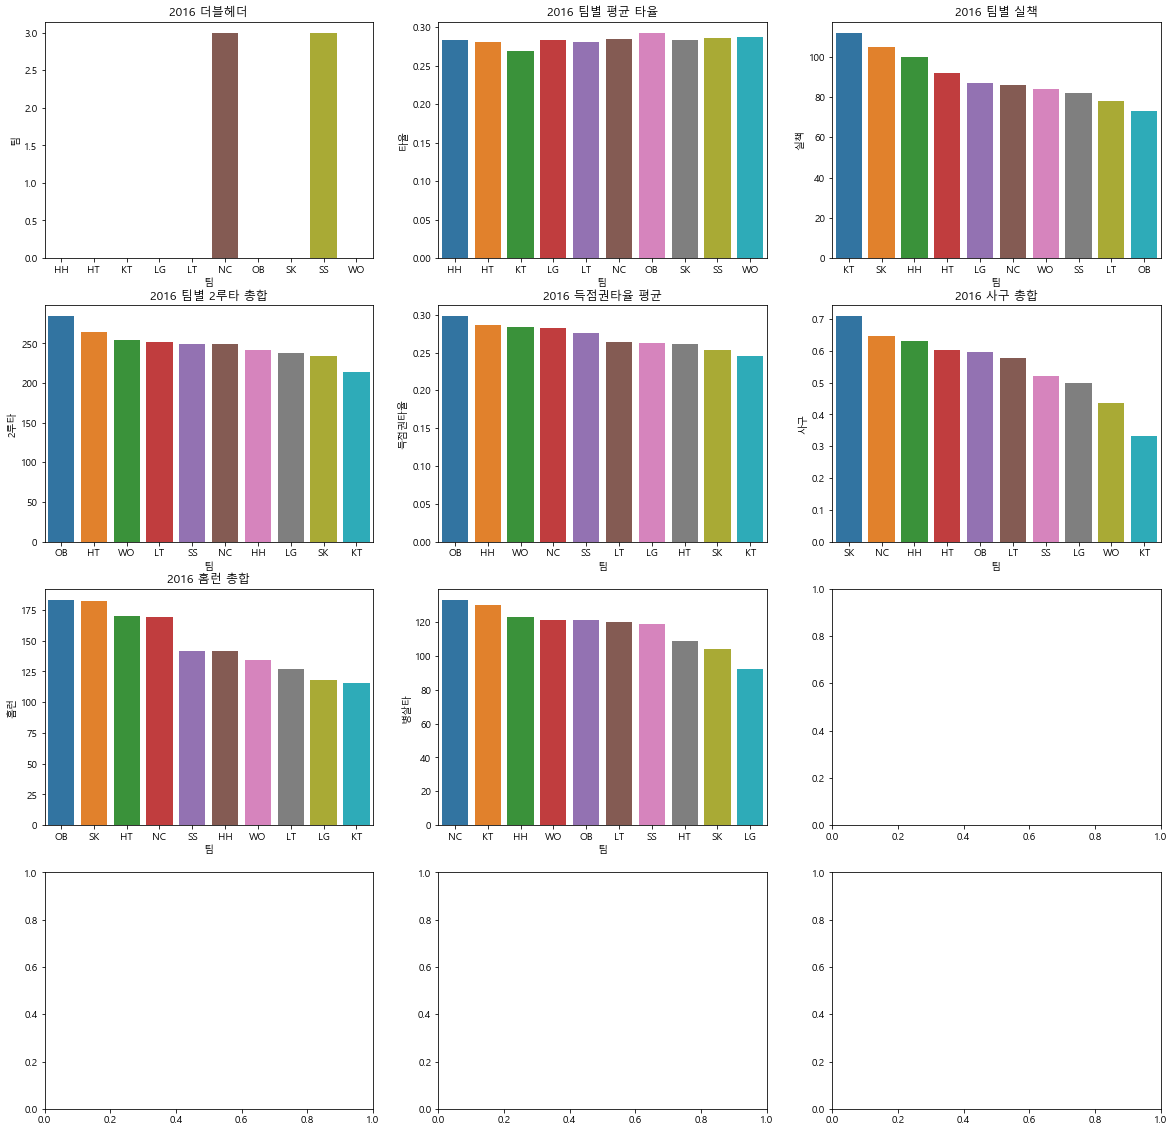

In [352]:
figure, ((ax1,ax2,ax3), (ax4,ax5,ax6),(ax7,ax8,ax9),(ax10,ax11,ax12)) = plt.subplots(nrows=4, ncols=3)
figure.set_size_inches(20,20)

sns.barplot(data=HEADER_2016, x="팀", y="더블헤더코드", ax=ax1)
sns.barplot(data=AVG_mean_2016, x="팀", y="타율", ax=ax2)
sns.barplot(data=ERR_2016, x="팀", y="실책", ax=ax3)
sns.barplot(data=H2_2016, x="팀", y="2루타", ax=ax4)
sns.barplot(data=P_HRA_2016, x="팀", y="득점권타율", ax=ax5)
sns.barplot(data=dead_ball_2016, x="팀", y="사구", ax=ax6)
sns.barplot(data=HR_2016, x="팀", y="홈런", ax=ax7)
sns.barplot(data=GD_2016, x="팀", y="병살타", ax=ax8)
ax1.set(ylabel='팀',title="2016 더블헤더")
ax2.set(xlabel='팀',title="2016 팀별 평균 타율")
ax3.set(xlabel='팀', title="2016 팀별 실책")
ax4.set(xlabel='팀', title="2016 팀별 2루타 총합")
ax5.set(xlabel='팀', title="2016 득점권타율 평균")
ax6.set(xlabel='팀', title="2016 사구 총합")
ax7.set(xlabel='팀', title="2016 홈런 총합")
#실책이 가장 많은 KT가 평균 타율 꼴찌, 반면 실책이 제일 적은 OB가 팀별 평균 타율 제일 높음
#더블헤더는 NC, SS 각각 3번씩 밖에 없었다
#

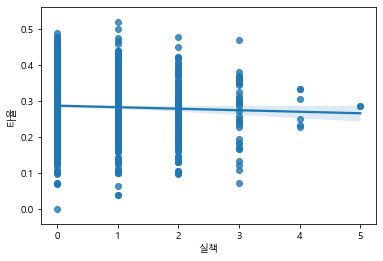

In [353]:
sns.regplot(x='실책',y='타율',data=team_2016)
#선형관계라 보기 어려울듯


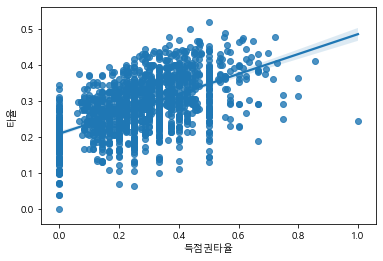

In [262]:
sns.regplot('득점권타율','타율',data=team_2016)
#득점권타율과 타율 간의 회귀선 그려본 결과 선형적인 관계가 있음을 알 수 있었다.
#잔차의 등분산도 만족하는 듯하다.
#득점권 타율이 높은데 타율이 낮은 데이터 존재


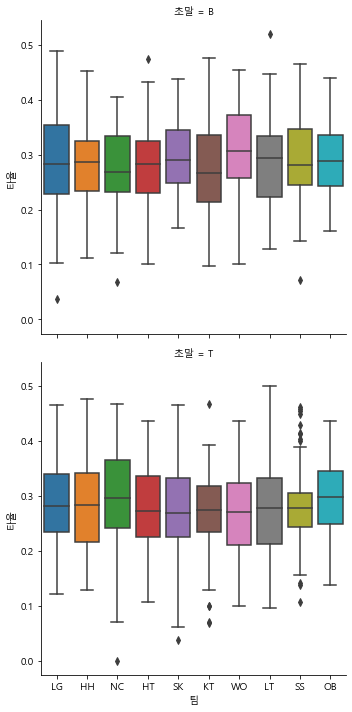

In [141]:
sns.factorplot(x='팀',y='타율',row='초말',data=team_2016,kind='box')

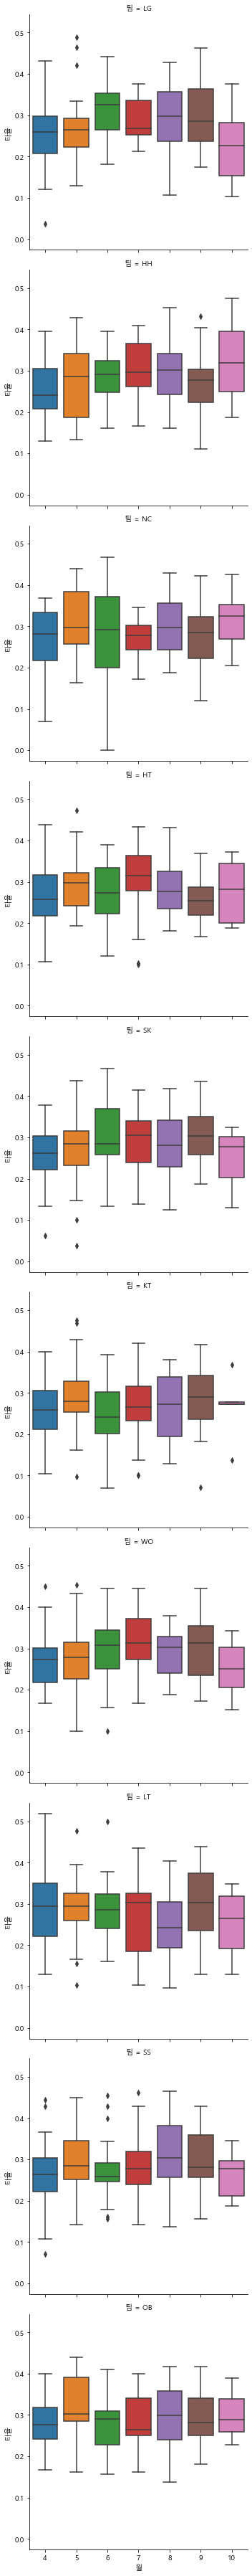

In [285]:
sns.factorplot(x='월',y='타율',row='팀',data=team_2016,kind='box')
#LG: 년도의 마지막에 부진한 성적
#HH: 연말에 가장 좋은 성적(표본이 너무 적은 탓)
#NC: 마찬가지 + 아웃라이어가 없다(변동이 적었다)
#HT: MAX는 7월에 대체로 굴곡 없는 성적
#SK: 마찬가지
#KT: 10월에 경기가 4개라 저럼
#WO: 마찬가지


# 2017

In [354]:
HEADER_2017=team_2017.groupby(['팀'])['더블헤더코드'].sum().reset_index()
AVG_mean_2017=team_2017.groupby(['팀'])['타율'].mean().reset_index()
ERR_2017=team_2017.groupby(['팀'])['실책'].sum().sort_values(ascending=False).reset_index()
H2_2017=team_2017.groupby(['팀'])['2루타'].sum().sort_values(ascending=False).reset_index()
P_HRA_2017=team_2017.groupby(['팀'])['득점권타율'].mean().sort_values(ascending=False).reset_index()
dead_ball_2017=team_2017.groupby(['팀'])['사구'].mean().sort_values(ascending=False).reset_index()
HR_2017=team_2017.groupby(['팀'])['홈런'].sum().sort_values(ascending=False).reset_index()
GD_2017=team_2017.groupby(['팀'])['병살타'].sum().sort_values(ascending=False).reset_index()

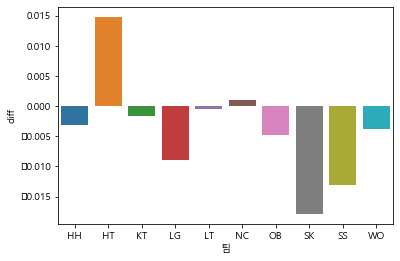

In [360]:
#이전 년도와의 타율 차이 살피기

AVG_mean_2017['before']=AVG_mean_2016['타율']
AVG_mean_2017['diff']=AVG_mean_2017['타율']-AVG_mean_2016['타율']




sns.barplot(data=AVG_mean_2017,x='팀',y='diff')
#HT의 상승세, SK,SS의 하락세

In [359]:
AVG_mean_2017

,팀,타율,before,diff
0,HH,0.280649,0.283851,-0.003201
1,HT,0.295191,0.280392,0.014799
2,KT,0.267752,0.269411,-0.001658
3,LG,0.275060,0.284002,-0.008942
4,LT,0.280531,0.280963,-0.000432
5,NC,0.285947,0.284952,0.000996
6,OB,0.288048,0.292838,-0.004790
7,SK,0.265832,0.283797,-0.017965
8,SS,0.273565,0.286649,-0.013084
9,WO,0.284109,0.287966,-0.003857


[Text(0.5, 0, '팀'), Text(0.5, 1.0, '2017 홈런 총합')]

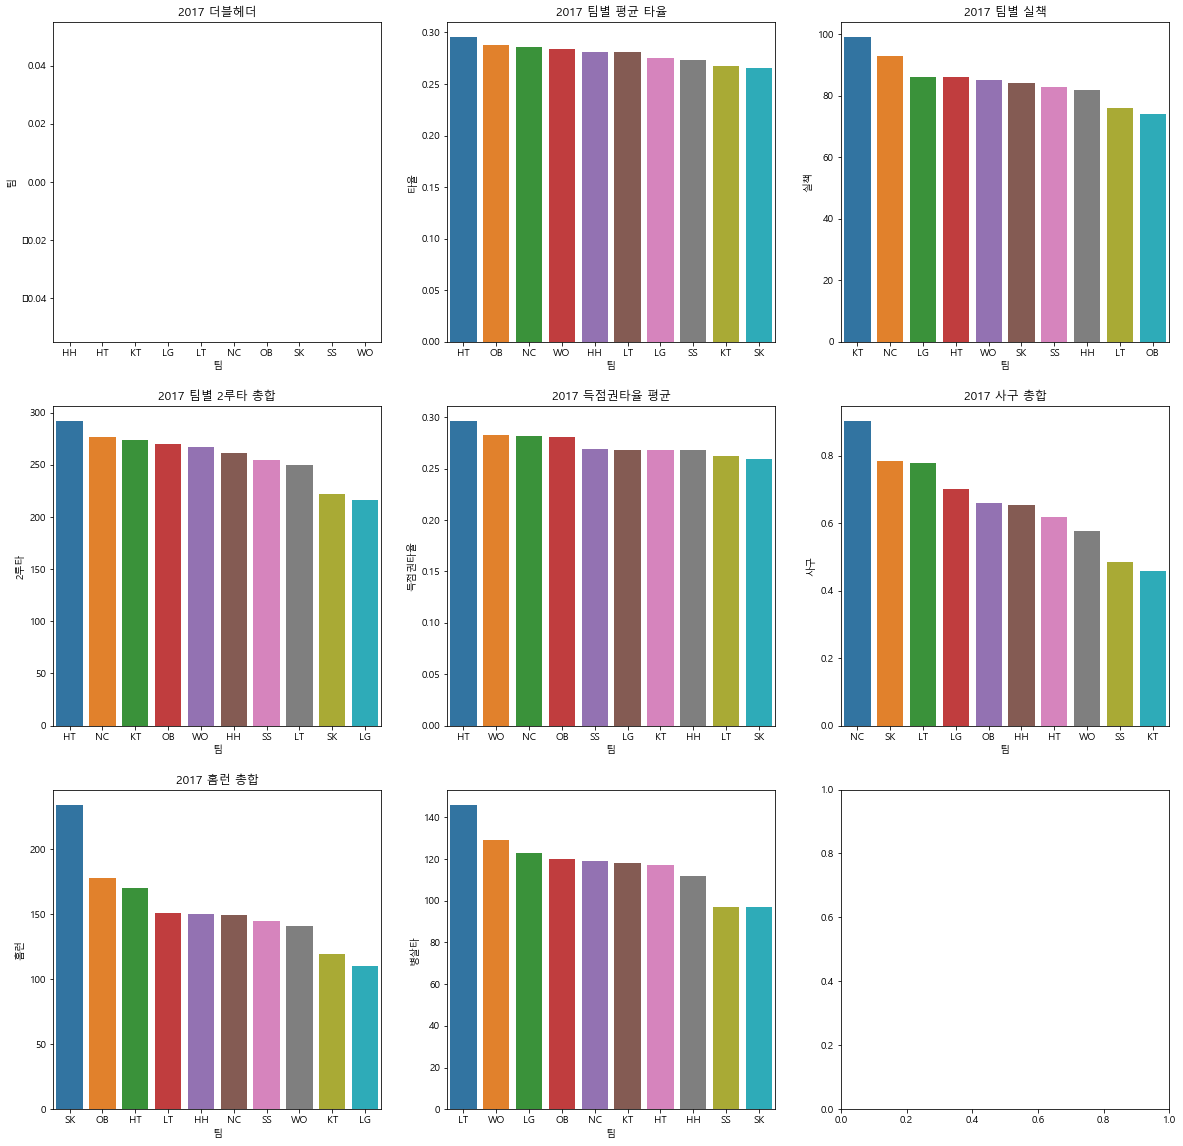

In [294]:
figure, ((ax1,ax2,ax3), (ax4,ax5,ax6),(ax7,ax8,ax9)) = plt.subplots(nrows=3, ncols=3)
figure.set_size_inches(20,20)

sns.barplot(data=HEADER_2017, x="팀", y="더블헤더코드", ax=ax1)
sns.barplot(data=AVG_mean_2017, x="팀", y="타율", ax=ax2)
sns.barplot(data=ERR_2017, x="팀", y="실책", ax=ax3)
sns.barplot(data=H2_2017, x="팀", y="2루타", ax=ax4)
sns.barplot(data=P_HRA_2017, x="팀", y="득점권타율", ax=ax5)
sns.barplot(data=dead_ball_2017, x="팀", y="사구", ax=ax6)
sns.barplot(data=HR_2017, x="팀", y="홈런", ax=ax7)
sns.barplot(data=GD_2017, x="팀", y="병살타", ax=ax8)
ax1.set(ylabel='팀',title="2017 더블헤더")
ax2.set(xlabel='팀',title="2017 팀별 평균 타율")
ax3.set(xlabel='팀', title="2017 팀별 실책")
ax4.set(xlabel='팀', title="2017 팀별 2루타 총합")
ax5.set(xlabel='팀', title="2017 득점권타율 평균")
ax6.set(xlabel='팀', title="2017 사구 총합")
ax7.set(xlabel='팀', title="2017 홈런 총합")
#2017년도에는 실책과 타율간에 상관관계가 높지 않았다( 그저 우연이었나본데)
#더블헤더 없었음
#

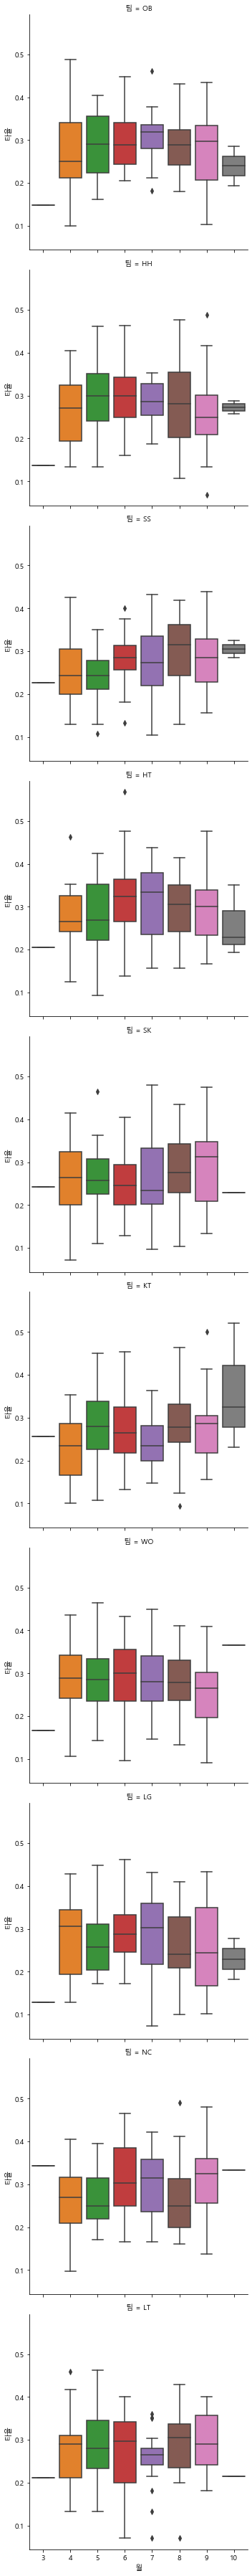

In [295]:
sns.factorplot(x='월',y='타율',row='팀',data=team_2017,kind='box')

# 2018

In [361]:
HEADER_2018=team_2018.groupby(['팀'])['더블헤더코드'].sum().reset_index()
AVG_mean_2018=team_2018.groupby(['팀'])['타율'].mean().reset_index()
ERR_2018=team_2018.groupby(['팀'])['실책'].sum().sort_values(ascending=False).reset_index()
H2_2018=team_2018.groupby(['팀'])['2루타'].sum().sort_values(ascending=False).reset_index()
P_HRA_2018=team_2018.groupby(['팀'])['득점권타율'].mean().sort_values(ascending=False).reset_index()
dead_ball_2018=team_2018.groupby(['팀'])['사구'].mean().sort_values(ascending=False).reset_index()
HR_2018=team_2018.groupby(['팀'])['홈런'].sum().sort_values(ascending=False).reset_index()
GD_2018=team_2018.groupby(['팀'])['병살타'].sum().sort_values(ascending=False).reset_index()

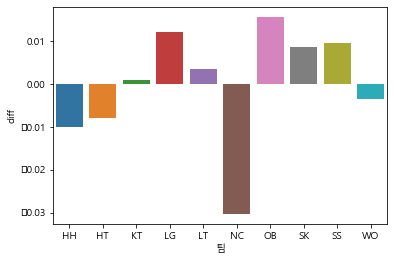

In [363]:
AVG_mean_2018['before']=AVG_mean_2017['타율']
AVG_mean_2018['diff']=AVG_mean_2018['타율']-AVG_mean_2017['타율']


AVG_mean_2018

sns.barplot(data=AVG_mean_2018,x='팀',y='diff')
#이번엔 NC의 타율이 0.03정도 큰 폭으로 감소
# 
#나머지는 큰 변화 없어보인다
#타율 1등팀이었던 OB의 성장세

In [364]:
AVG_mean_2018

,팀,타율,before,diff
0,HH,0.270677,0.280649,-0.009972
1,HT,0.287307,0.295191,-0.007884
2,KT,0.268595,0.267752,0.000843
3,LG,0.287038,0.275060,0.011979
4,LT,0.283970,0.280531,0.003439
5,NC,0.255512,0.285947,-0.030436
6,OB,0.303655,0.288048,0.015606
7,SK,0.274472,0.265832,0.008640
8,SS,0.283057,0.273565,0.009492
9,WO,0.280587,0.284109,-0.003522


[Text(0.5, 0, '팀'), Text(0.5, 1.0, '2018 홈런 총합')]

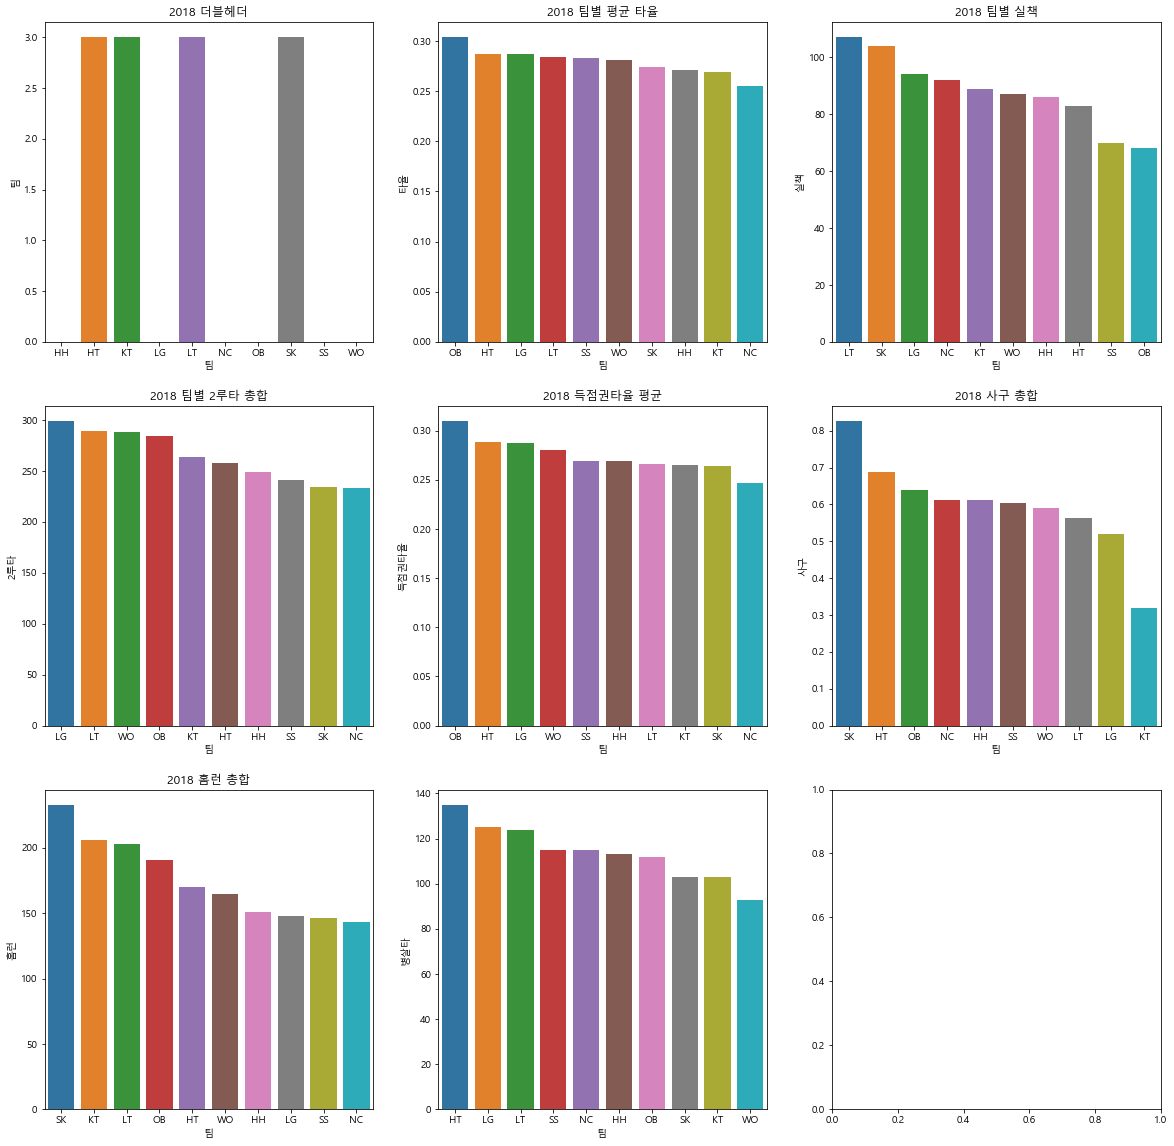

In [305]:
figure, ((ax1,ax2,ax3), (ax4,ax5,ax6),(ax7,ax8,ax9)) = plt.subplots(nrows=3, ncols=3)
figure.set_size_inches(20,20)

sns.barplot(data=HEADER_2018, x="팀", y="더블헤더코드", ax=ax1)
sns.barplot(data=AVG_mean_2018, x="팀", y="타율", ax=ax2)
sns.barplot(data=ERR_2018, x="팀", y="실책", ax=ax3)
sns.barplot(data=H2_2018, x="팀", y="2루타", ax=ax4)
sns.barplot(data=P_HRA_2018, x="팀", y="득점권타율", ax=ax5)
sns.barplot(data=dead_ball_2018, x="팀", y="사구", ax=ax6)
sns.barplot(data=HR_2018, x="팀", y="홈런", ax=ax7)
sns.barplot(data=GD_2018, x="팀", y="병살타", ax=ax8)
ax1.set(ylabel='팀',title="2018 더블헤더")
ax2.set(xlabel='팀',title="2018 팀별 평균 타율")
ax3.set(xlabel='팀', title="2018 팀별 실책")
ax4.set(xlabel='팀', title="2018 팀별 2루타 총합")
ax5.set(xlabel='팀', title="2018 득점권타율 평균")
ax6.set(xlabel='팀', title="2018 사구 총합")
ax7.set(xlabel='팀', title="2018 홈런 총합")
#2018년도에는 실책과 타율간에 상관관계가 높지 않았다( 그저 우연이었나본데)
#더블헤더 없었음
#

In [336]:
team_2018.groupby(['팀'])['더블헤더코드'].sum()

팀
HH    0
HT    3
KT    3
LG    0
LT    3
NC    0
OB    0
SK    3
SS    0
WO    0
Name: 더블헤더코드, dtype: int64

In [337]:
team_2018[team_2018['더블헤더코드']!=0]
#하루에 세 경기나 치뤄짐
#20181006HTSK0,1,2
#20181010KTLT0,1,2

,게임키,일자,팀,상대팀코드,더블헤더코드,초말,타자,총타수,타점,득점,...,삼진,병살타,실책,잔루,득점권타율,득점권타수,득점권안타,타율,년도,월
1390,20181006HTSK1,20181006,SK,HT,1,B,38,34,3,4,...,5,0,2,7,0.142857,7,1,0.235294,2018,10
1391,20181006HTSK1,20181006,HT,SK,1,T,47,37,7,8,...,6,0,1,12,0.210526,19,4,0.351351,2018,10
1392,20181006HTSK2,20181006,SK,HT,2,B,38,34,7,7,...,8,0,1,7,0.352941,17,6,0.323529,2018,10
1393,20181006HTSK2,20181006,HT,SK,2,T,37,36,5,5,...,8,1,1,5,0.500000,2,1,0.250000,2018,10
1412,20181010KTLT1,20181010,LT,KT,1,B,33,32,1,1,...,12,1,3,5,0.500000,2,1,0.187500,2018,10
1413,20181010KTLT1,20181010,KT,LT,1,T,44,41,9,10,...,7,1,0,7,0.466667,15,7,0.292683,2018,10
1414,20181010KTLT2,20181010,LT,KT,2,B,31,30,0,0,...,10,1,1,4,0.000000,3,0,0.133333,2018,10
1415,20181010KTLT2,20181010,KT,LT,2,T,39,35,7,7,...,6,1,0,5,0.250000,4,1,0.228571,2018,10


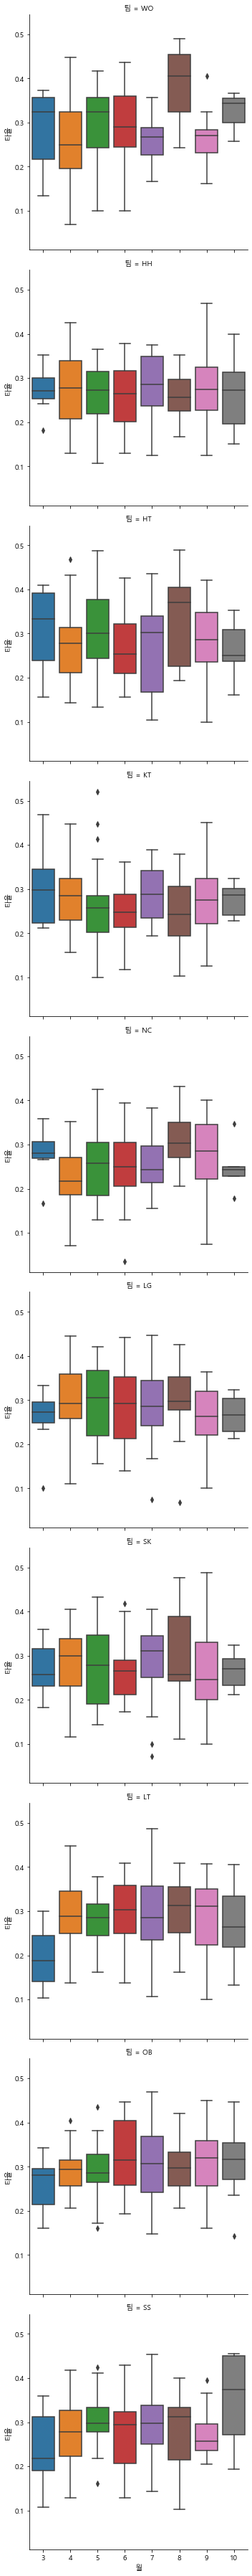

In [307]:
sns.factorplot(x='월',y='타율',row='팀',data=team_2018,kind='box')
#유난히 WO가 타율이 높아진 이유?# 18년 8월 데이터 살펴보기
#부진하다 상승세 보이는 NC

In [314]:
team_2018[(team_2018['팀']=='WO') & (team_2018['월']==8)]
#원인은 한화와 LG상대로 높은 타율을 기록했기 때문이었음
#평소엔 ?



,게임키,일자,팀,상대팀코드,더블헤더코드,초말,타자,총타수,타점,득점,...,삼진,병살타,실책,잔루,득점권타율,득점권타수,득점권안타,타율,년도,월
1021,20180801WOSK0,20180801,WO,SK,0,T,44,37,8,8,...,11,2,2,9,0.250000,12,3,0.324324,2018,8
1031,20180802WOSK0,20180802,WO,SK,0,T,37,34,3,4,...,9,1,0,6,0.200000,5,1,0.323529,2018,8
1041,20180804WOKT0,20180804,WO,KT,0,T,34,33,3,3,...,9,2,0,4,0.000000,0,0,0.242424,2018,8
1051,20180805WOKT0,20180805,WO,KT,0,T,57,44,19,20,...,5,1,0,10,0.473684,19,9,0.454545,2018,8
1054,20180807HTWO0,20180807,WO,HT,0,B,42,40,9,9,...,8,0,0,9,0.388889,18,7,0.475000,2018,8
1064,20180808HTWO0,20180808,WO,HT,0,B,46,39,6,7,...,5,0,1,10,0.333333,12,4,0.384615,2018,8
1081,20180809WOHH0,20180809,WO,HH,0,T,54,51,16,16,...,4,2,1,11,0.500000,26,13,0.490196,2018,8
1089,20180810WOHH0,20180810,WO,HH,0,T,45,42,8,9,...,10,0,0,9,0.294118,17,5,0.404762,2018,8
1094,20180811LGWO0,20180811,WO,LG,0,B,48,39,13,13,...,4,1,2,11,0.294118,17,5,0.461538,2018,8
1104,20180812LGWO0,20180812,WO,LG,0,B,41,37,11,11,...,5,1,1,6,0.538462,13,7,0.405405,2018,8


In [330]:
df1=team_2017.groupby(['팀','상대팀코드'])['타율'].mean().reset_index()
df1[df1['팀']=='WO']
#이전에는 한화 상대로 타율이 높았고, LG상대로는 타율이 그닥 높지 않았던 편

,팀,상대팀코드,타율
81,WO,HH,0.323475
82,WO,HT,0.269521
83,WO,KT,0.277463
84,WO,LG,0.233142
85,WO,LT,0.269686
86,WO,NC,0.261326
87,WO,OB,0.306165
88,WO,SK,0.286554
89,WO,SS,0.329655


# 2019

In [365]:
HEADER_2019=team_2019.groupby(['팀'])['더블헤더코드'].sum().reset_index()
AVG_mean_2019=team_2019.groupby(['팀'])['타율'].mean().reset_index()
ERR_2019=team_2019.groupby(['팀'])['실책'].sum().sort_values(ascending=False).reset_index()
H2_2019=team_2019.groupby(['팀'])['2루타'].sum().sort_values(ascending=False).reset_index()
P_HRA_2019=team_2019.groupby(['팀'])['득점권타율'].mean().sort_values(ascending=False).reset_index()
dead_ball_2019=team_2019.groupby(['팀'])['사구'].mean().sort_values(ascending=False).reset_index()
HR_2019=team_2019.groupby(['팀'])['홈런'].sum().sort_values(ascending=False).reset_index()
GD_2019=team_2019.groupby(['팀'])['병살타'].sum().sort_values(ascending=False).reset_index()

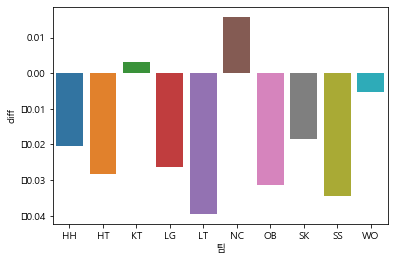

In [368]:
AVG_mean_2019['before']=AVG_mean_2018['타율']
AVG_mean_2019['diff']=AVG_mean_2019['타율']-AVG_mean_2018['타율']


sns.barplot(data=AVG_mean_2019,x='팀',y='diff')
#타율이 전체적으로 감소(왜?)
#NC의 비약적 상승


In [367]:
AVG_mean_2019

,팀,타율,before,diff
0,HH,0.250200,0.270677,-0.020477
1,HT,0.259113,0.287307,-0.028195
2,KT,0.271877,0.268595,0.003282
3,LG,0.260809,0.287038,-0.026230
4,LT,0.244343,0.283970,-0.039627
5,NC,0.271355,0.255512,0.015844
6,OB,0.272255,0.303655,-0.031400
7,SK,0.255987,0.274472,-0.018485
8,SS,0.248590,0.283057,-0.034466
9,WO,0.275331,0.280587,-0.005257


[Text(0.5, 0, '팀'), Text(0.5, 1.0, '2019 홈런 총합')]

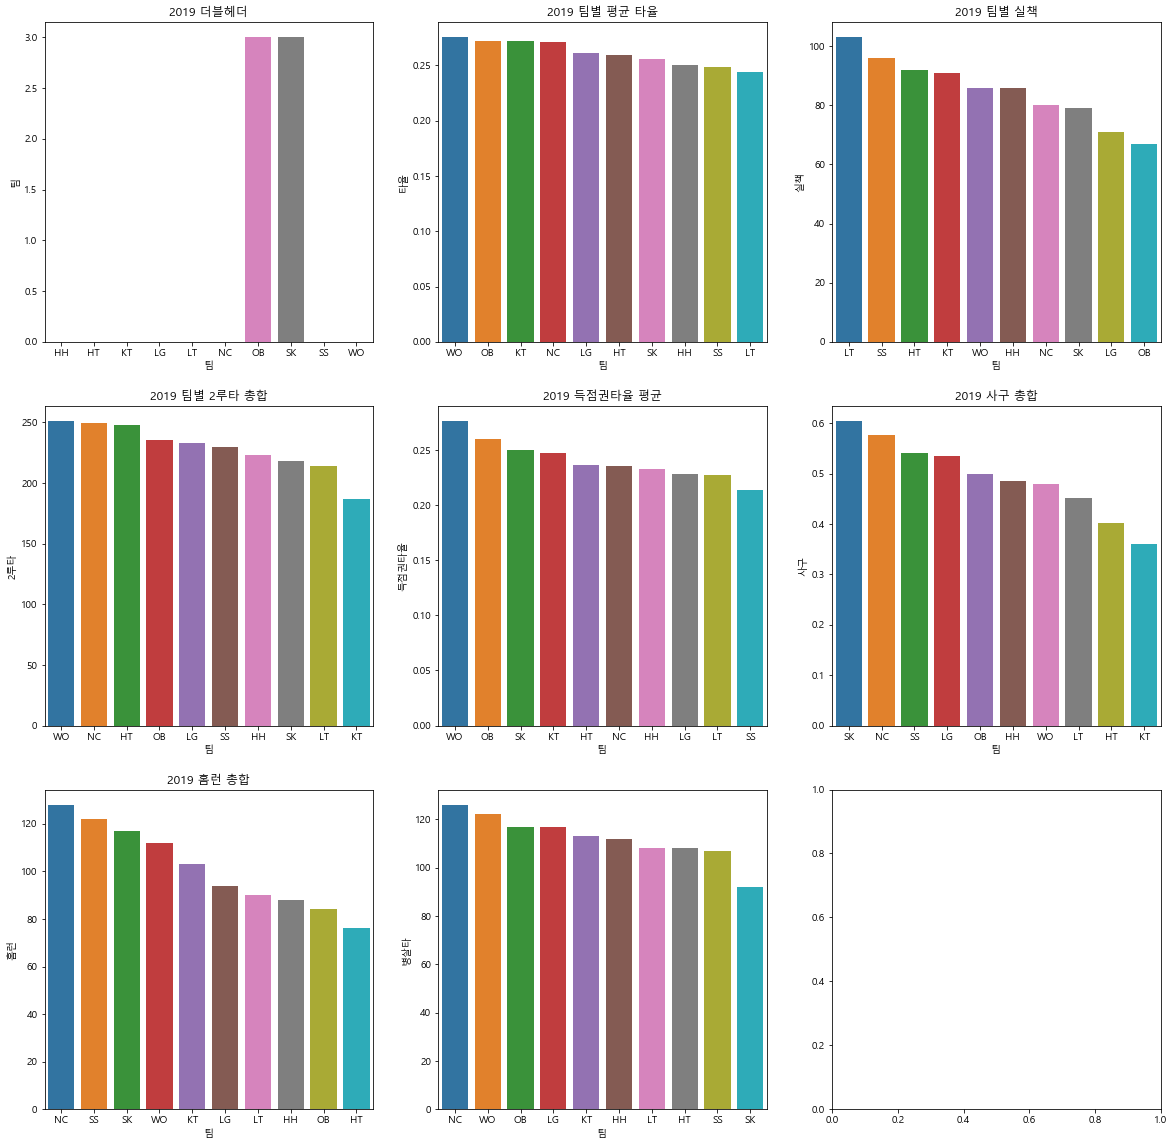

In [347]:
figure, ((ax1,ax2,ax3), (ax4,ax5,ax6),(ax7,ax8,ax9)) = plt.subplots(nrows=3, ncols=3)
figure.set_size_inches(20,20)

sns.barplot(data=HEADER_2019, x="팀", y="더블헤더코드", ax=ax1)
sns.barplot(data=AVG_mean_2019, x="팀", y="타율", ax=ax2)
sns.barplot(data=ERR_2019, x="팀", y="실책", ax=ax3)
sns.barplot(data=H2_2019, x="팀", y="2루타", ax=ax4)
sns.barplot(data=P_HRA_2019, x="팀", y="득점권타율", ax=ax5)
sns.barplot(data=dead_ball_2019, x="팀", y="사구", ax=ax6)
sns.barplot(data=HR_2019, x="팀", y="홈런", ax=ax7)
sns.barplot(data=GD_2019, x="팀", y="병살타", ax=ax8)
ax1.set(ylabel='팀',title="2019 더블헤더")
ax2.set(xlabel='팀',title="2019 팀별 평균 타율")
ax3.set(xlabel='팀', title="2019 팀별 실책")
ax4.set(xlabel='팀', title="2019 팀별 2루타 총합")
ax5.set(xlabel='팀', title="2019 득점권타율 평균")
ax6.set(xlabel='팀', title="2019 사구 총합")
ax7.set(xlabel='팀', title="2019 홈런 총합")


In [339]:
team_2019.groupby(['팀'])['더블헤더코드'].sum()

팀
HH    0
HT    0
KT    0
LG    0
LT    0
NC    0
OB    3
SK    3
SS    0
WO    0
Name: 더블헤더코드, dtype: int64

In [344]:
team_2019[team_2019['더블헤더코드']!=0]

,게임키,일자,팀,상대팀코드,더블헤더코드,초말,타자,총타수,타점,득점,...,삼진,병살타,실책,잔루,득점권타율,득점권타수,득점권안타,타율,년도,월
1365,20190919OBSK1,20190919,OB,SK,1,T,43,37,6,6,...,4,0,0,10,0.250000,12,3,0.297297,2019,9
1366,20190919OBSK2,20190919,OB,SK,2,T,41,33,7,7,...,7,2,0,7,0.250000,4,1,0.333333,2019,9
1367,20190919OBSK1,20190919,SK,OB,1,B,38,35,4,4,...,10,1,1,7,0.181818,11,2,0.257143,2019,9
1368,20190919OBSK2,20190919,SK,OB,2,B,30,30,3,3,...,8,0,1,0,0.000000,0,0,0.133333,2019,9


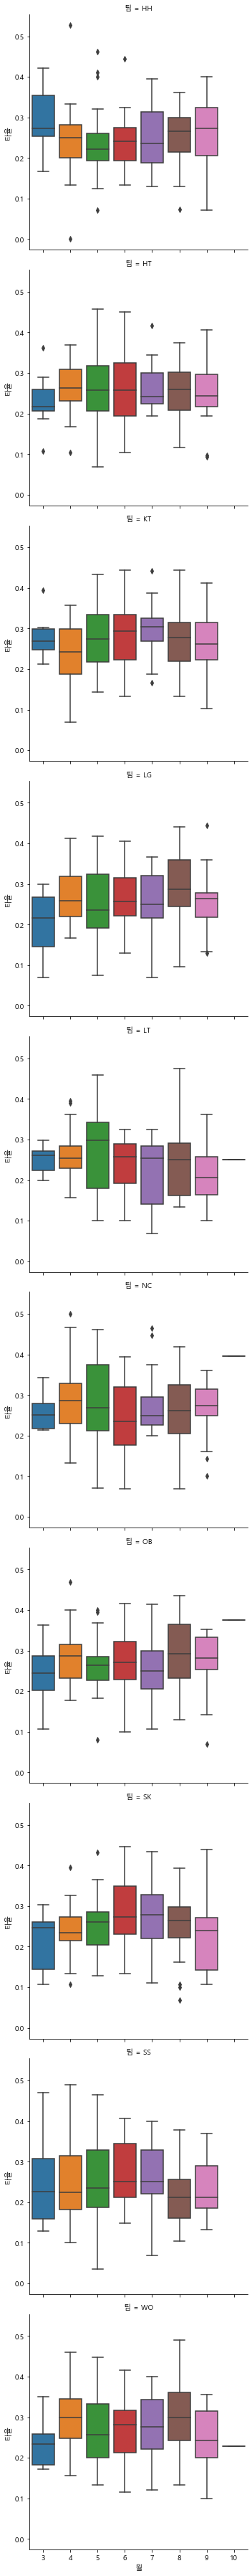

In [345]:
sns.factorplot(x='월',y='타율',row='팀',data=team_2019,kind='box')

In [343]:
AVG_mean_2019

,팀,타율,before,diff
0,WO,0.275331,0.303655,-0.028324
1,OB,0.272255,0.287307,-0.015053
2,KT,0.271877,0.287038,-0.015161
3,NC,0.271355,0.283970,-0.012615
4,LG,0.260809,0.283057,-0.022248
5,HT,0.259113,0.280587,-0.021474
6,SK,0.255987,0.274472,-0.018485
7,HH,0.250200,0.270677,-0.020477
8,SS,0.248590,0.268595,-0.020004
9,LT,0.244343,0.255512,-0.011169


# 2020

In [369]:
HEADER_2020=team_2020.groupby(['팀'])['더블헤더코드'].sum().reset_index()
AVG_mean_2020=team_2020.groupby(['팀'])['타율'].mean()reset_index()
ERR_2020=team_2020.groupby(['팀'])['실책'].sum().sort_values(ascending=False).reset_index()
H2_2020=team_2020.groupby(['팀'])['2루타'].sum().sort_values(ascending=False).reset_index()
P_HRA_2020=team_2020.groupby(['팀'])['득점권타율'].mean().sort_values(ascending=False).reset_index()
dead_ball_2020=team_2020.groupby(['팀'])['사구'].mean().sort_values(ascending=False).reset_index()
HR_2020=team_2020.groupby(['팀'])['홈런'].sum().sort_values(ascending=False).reset_index()
GD_2020=team_2020.groupby(['팀'])['병살타'].sum().sort_values(ascending=False).reset_index()

SyntaxError: invalid syntax (<ipython-input-369-40bd8359e637>, line 2)

[Text(0.5, 0, '팀'), Text(0.5, 1.0, '2020 홈런 총합')]

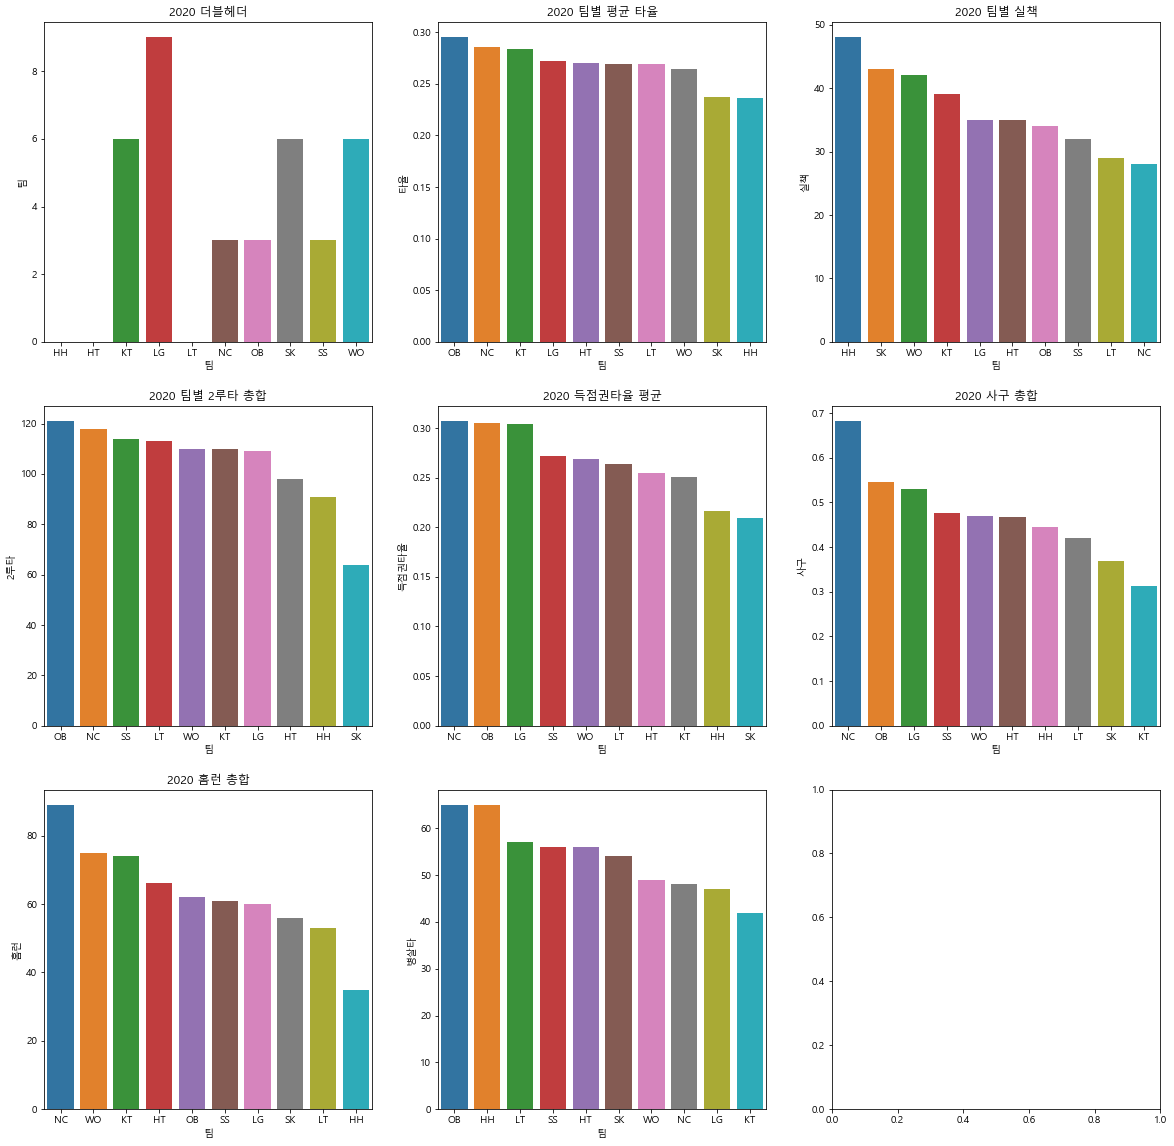

In [370]:
figure, ((ax1,ax2,ax3), (ax4,ax5,ax6),(ax7,ax8,ax9)) = plt.subplots(nrows=3, ncols=3)
figure.set_size_inches(20,20)

sns.barplot(data=HEADER_2020, x="팀", y="더블헤더코드", ax=ax1)
sns.barplot(data=AVG_mean_2020, x="팀", y="타율", ax=ax2)
sns.barplot(data=ERR_2020, x="팀", y="실책", ax=ax3)
sns.barplot(data=H2_2020, x="팀", y="2루타", ax=ax4)
sns.barplot(data=P_HRA_2020, x="팀", y="득점권타율", ax=ax5)
sns.barplot(data=dead_ball_2020, x="팀", y="사구", ax=ax6)
sns.barplot(data=HR_2020, x="팀", y="홈런", ax=ax7)
sns.barplot(data=GD_2020, x="팀", y="병살타", ax=ax8)
ax1.set(ylabel='팀',title="2020 더블헤더")
ax2.set(xlabel='팀',title="2020 팀별 평균 타율")
ax3.set(xlabel='팀', title="2020 팀별 실책")
ax4.set(xlabel='팀', title="2020 팀별 2루타 총합")
ax5.set(xlabel='팀', title="2020 득점권타율 평균")
ax6.set(xlabel='팀', title="2020 사구 총합")
ax7.set(xlabel='팀', title="2020 홈런 총합")


In [371]:
team_2020.groupby(['팀'])['더블헤더코드'].sum()

팀
HH    0
HT    0
KT    6
LG    9
LT    0
NC    3
OB    3
SK    6
SS    3
WO    6
Name: 더블헤더코드, dtype: int64

In [372]:
team_2020[team_2020['더블헤더코드']!=0]
#무려 24경기나 같은날에 치루는 경기가 많았다.


,게임키,일자,팀,상대팀코드,더블헤더코드,초말,타자,총타수,타점,득점,...,삼진,병살타,실책,잔루,득점권타율,득점권타수,득점권안타,타율,년도,월
100,20200516WOLG1,20200516,LG,WO,1,B,30,25,3,3,...,5,1,0,3,0.333333,6,2,0.160000,2020,5
101,20200516WOLG1,20200516,WO,LG,1,T,37,33,1,1,...,7,0,1,9,0.111111,9,1,0.181818,2020,5
102,20200516WOLG2,20200516,LG,WO,2,B,38,32,5,5,...,9,0,0,9,0.375000,8,3,0.312500,2020,5
103,20200516WOLG2,20200516,WO,LG,2,T,37,32,2,3,...,5,3,0,7,0.600000,5,3,0.281250,2020,5
318,20200611SKLG1,20200611,LG,SK,1,B,37,32,3,3,...,4,1,1,10,0.166667,6,1,0.312500,2020,6
319,20200611SKLG1,20200611,SK,LG,1,T,35,34,1,1,...,8,0,0,7,0.142857,7,1,0.176471,2020,6
320,20200611SKLG2,20200611,LG,SK,2,B,33,26,4,4,...,5,0,0,5,0.200000,5,1,0.153846,2020,6
321,20200611SKLG2,20200611,SK,LG,2,T,38,34,3,3,...,10,0,0,8,0.166667,6,1,0.264706,2020,6
334,20200613KTSS1,20200613,SS,KT,1,B,33,29,4,5,...,6,0,0,4,0.333333,6,2,0.241379,2020,6
335,20200613KTSS1,20200613,KT,SS,1,T,34,32,3,3,...,5,0,0,4,0.250000,4,1,0.187500,2020,6


In [373]:
team_2020[team_2020['더블헤더코드']!=0]['팀'].value_counts()

LG    6
SK    4
WO    4
KT    4
NC    2
SS    2
OB    2
Name: 팀, dtype: int64

# 전체


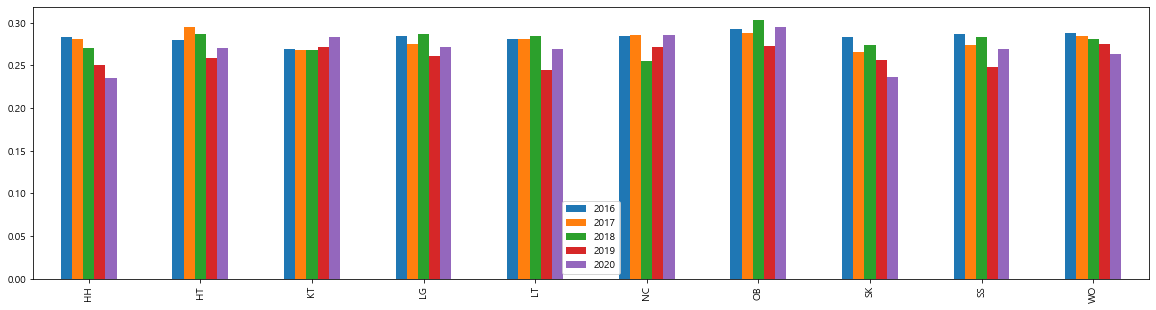

In [201]:
#년도별 타율 경향성 살피기
teams=pd.DataFrame()
teams['2016']=team_2016.groupby(['팀'])['타율'].mean()

teams['2017']=team_2017.groupby(['팀'])['타율'].mean()
teams['2018']=team_2018.groupby(['팀'])['타율'].mean()
teams['2019']=team_2019.groupby(['팀'])['타율'].mean()
teams['2020']=team_2020.groupby(['팀'])['타율'].mean()

plt.rc('figure',figsize=(20,5))
teams.plot.bar()

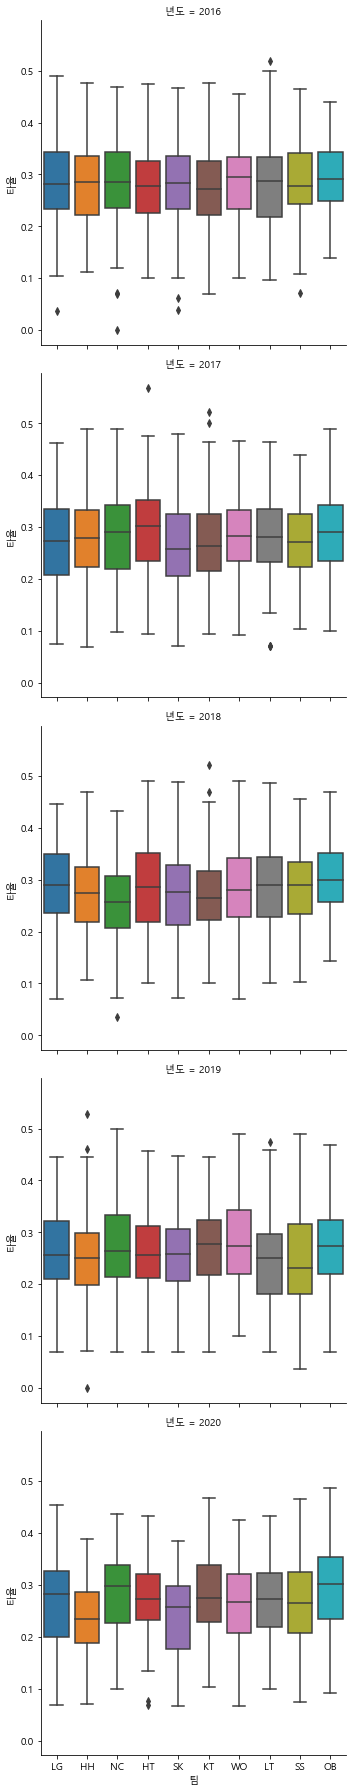

In [217]:
sns.factorplot(x='팀',y='타율',row='년도',data=team,kind='box')

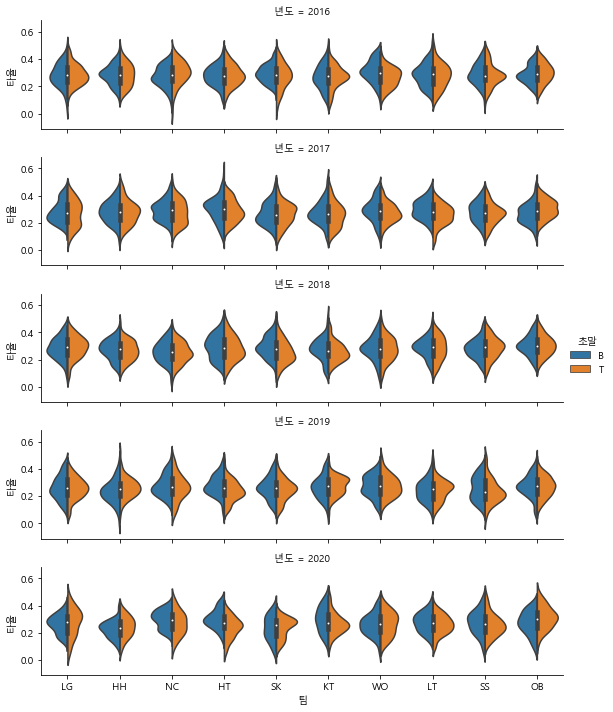

In [264]:
sns.catplot(x="팀", y="타율", hue="초말", row="년도", data=team,
            kind="violin", split=True, height=2, aspect=4)

#초말에 따라 지나치게 비대칭성을 보이는 분포는 없어보인다.

# 타깃 값과 상관관계 분석

In [374]:
team.columns

Index(['게임키', '일자', '팀', '상대팀코드', '더블헤더코드', '초말', '타자', '총타수', '타점', '득점',
       '안타', '2루타', '3루타', '홈런', '도루', '도루실패', '희타', '희비', '4구', '고4', '사구',
       '삼진', '병살타', '실책', '잔루', '득점권타율', '득점권타수', '득점권안타', '타율', '년도', '월'],
      dtype='object')

In [381]:
def add_y_next(df):
    df['ym']=df['년도']+df['월']



    a=df['ym'].unique()
    b=list(range(len(a)))
    list_C = [ x for x in zip(a,b) ]
    dict1=dict(list_C)
    


    df['dummy']=df['ym'].map(dict1)

    df['dummy+1']=df['dummy']+1

    y_dict=df.groupby(['dummy'])['타율'].mean().to_dict()
    

    df['y_next']=df['dummy+1'].map(y_dict)

    df.drop(['dummy','dummy+1','ym','일자'],axis=1,inplace=True)
    #걍 날짜는 삭제(시계열 피쳐로 잡아주니까)
    df.dropna(inplace=True)#일단 드랍하고 진행
    return df

In [396]:
df=add_y_next(team)

KeyError: "['일자'] not found in axis"

In [397]:
df.columns

Index(['게임키', '팀', '상대팀코드', '타자', '총타수', '타점', '득점', '안타', '2루타', '3루타', '홈런',
       '도루', '도루실패', '희타', '희비', '4구', '고4', '사구', '삼진', '병살타', '실책', '잔루',
       '득점권타율', '득점권타수', '득점권안타', '타율', '년도', '월', 'y_next', '더블헤더코드_0',
       '더블헤더코드_1', '더블헤더코드_2', '초말_B', '초말_T'],
      dtype='object')

In [399]:
pd.get_dummies(df, columns = ['더블헤더코드','초말'])


KeyError: "None of [Index(['더블헤더코드', '초말'], dtype='object')] are in the [columns]"

In [400]:
df

,게임키,팀,상대팀코드,타자,총타수,타점,득점,안타,2루타,3루타,...,득점권안타,타율,년도,월,y_next,더블헤더코드_0,더블헤더코드_1,더블헤더코드_2,초말_B,초말_T
0,20160401HHLG0,LG,HH,47,42,4,5,9,2,0,...,4,0.214286,2016,4,0.276877,1,0,0,1,0
1,20160401HHLG0,HH,LG,52,46,4,4,13,2,0,...,3,0.282609,2016,4,0.276877,1,0,0,0,1
2,20160401HTNC0,NC,HT,36,30,5,5,9,2,0,...,1,0.300000,2016,4,0.276877,1,0,0,1,0
3,20160401HTNC0,HT,NC,38,34,3,4,8,3,0,...,1,0.235294,2016,4,0.276877,1,0,0,0,1
4,20160401KTSK0,SK,KT,36,36,4,4,10,5,0,...,3,0.277778,2016,4,0.276877,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,20200719LTSS0,LT,SS,31,29,2,2,6,1,0,...,0,0.206897,2020,7,0.256524,1,0,0,0,1
636,20200719OBHT0,HT,OB,38,32,4,4,8,0,1,...,4,0.250000,2020,7,0.256524,1,0,0,1,0
637,20200719OBHT0,OB,HT,41,37,8,8,11,3,0,...,4,0.297297,2020,7,0.256524,1,0,0,0,1
638,20200719WOSK0,SK,WO,37,30,3,4,6,0,0,...,2,0.200000,2020,7,0.256524,1,0,0,1,0


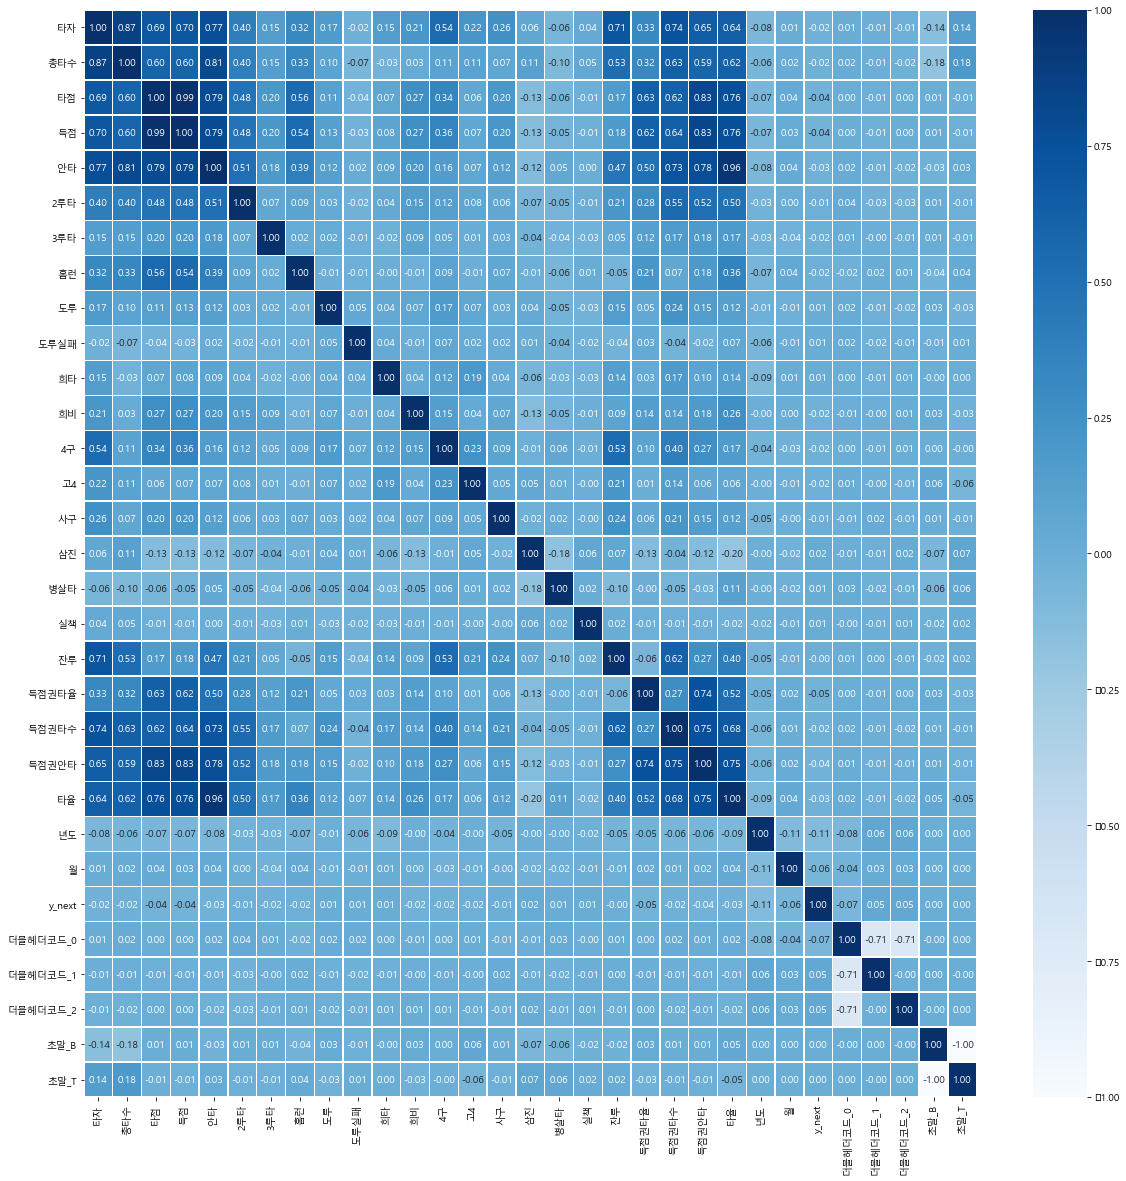

In [410]:
plt.figure(figsize=(20,20))
sns.heatmap(data=df.corr(),annot=True,fmt = '.2f', linewidths=.5, cmap='Blues')

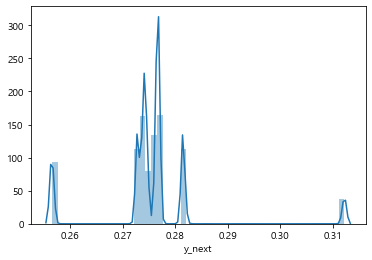

In [456]:
sns.distplot(df['y_next'])#기존

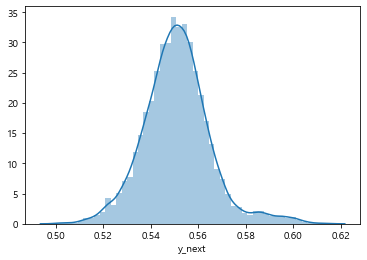

In [458]:
#정규화(노이즈 더해주기)
sns.distplot(df['y_next']+np.random.normal(df['y_next'].mean(),df['y_next'].std(),len(df['y_next'])))

In [452]:
np.random.normal(df['y_next'].mean(),df['y_next'].std(),len(df['y_next']))

array([0.27167627, 0.28535884, 0.27744934, ..., 0.27237934, 0.29214202,
       0.27839749])